# Validation of DWX model

Document to validate the DWX model as presented in the paper by [Deng et al. 2009](https://www.sciencedirect.com/science/article/pii/S0017931000001319#BIB16).

In [4147]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4148]:
Re=180
Pr = 0.71
yplus = np.logspace(-1,3)
viscous = Pr*yplus
loglayer = 2.78*np.log(yplus)+1.9

In [4161]:
#read the field
df_field = pd.read_fwf('../laminarbl.csv',widths=30*[20]) #the complete fi?eld
df_num = df_field[df_field['x']==df_field['x'].unique()[25]]
df_num = df_num.iloc[1:]
df_num['tau_u'] = df_num['k']/df_num['eps']*(Re)
df_num['tau_t'] = df_num['kt']/df_num['epst']*(Re)
df_num['ratio'] = df_num['tau_t']/df_num['tau_u']
df_num['kt_scaled'] = -1*np.sqrt(df_num['kt'])/df_num['ttau']
df_num['eps_scaled'] = df_num['epst']/((df_num['ttau']**2))*(1/Re)
df_num['y_'] = 1-df_num['y']

#read the validation data
df_val_tplus = pd.read_csv("validation_data/Deng(2001)_Tplus.csv",
                           sep='\t',header=None,names=['yplus','Tplus'])
df_val_kt    = pd.read_csv("validation_data/Deng(2001)_kt.csv", 
                           sep='\t',header=None,names=['yplus','kt']   )
df_val_eps   = pd.read_csv("validation_data/Deng(2001)_epst.csv", 
                           sep='\t',header=None,names=['yplus','epst'] )
df_val_tauu  = pd.read_csv("validation_data/Deng(2001)_tauu.csv", 
                           sep='\t',header=None,names=['yplus','tauu'] )
df_val_taut  = pd.read_csv("validation_data/Deng(2001)_taut.csv", 
                           sep='\t',header=None,names=['yplus','taut'] )
df_val_ratio = pd.read_csv("validation_data/Deng(2001)_ratio.csv", 
                           sep='\t',header=None,names=['yplus','ratio'])

In [4163]:
df_num['qwall']*Re*Pr

4851   -1.990418
4852   -1.990418
4853   -1.990418
4854   -1.990418
4855   -1.990418
4856   -1.990418
4857   -1.990418
4858   -1.990418
4859   -1.990418
4860   -1.990418
4861   -1.990418
4862   -1.990418
4863   -1.990418
4864   -1.990418
4865   -1.990418
4866   -1.990418
4867   -1.990418
4868   -1.990418
4869   -1.990418
4870   -1.990418
4871   -1.990418
4872   -1.990418
4873   -1.990418
4874   -1.990418
4875   -1.990418
4876   -1.990418
4877   -1.990418
4878   -1.990418
4879   -1.990418
4880   -1.990418
          ...   
5014   -1.990418
5015   -1.990418
5016   -1.990418
5017   -1.990418
5018   -1.990418
5019   -1.990418
5020   -1.990418
5021   -1.990418
5022   -1.990418
5023   -1.990418
5024   -1.990418
5025   -1.990418
5026   -1.990418
5027   -1.990418
5028   -1.990418
5029   -1.990418
5030   -1.990418
5031   -1.990418
5032   -1.990418
5033   -1.990418
5034   -1.990418
5035   -1.990418
5036   -1.990418
5037   -1.990418
5038   -1.990418
5039   -1.990418
5040   -1.990418
5041   -1.9904

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:3097: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  self.set_xlim(lower, upper, auto=None)


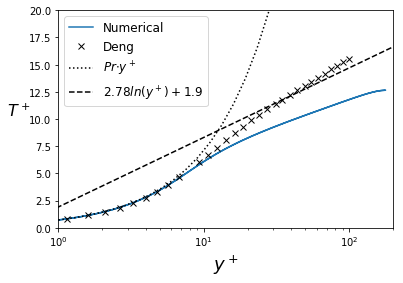

In [4156]:
fig, ax = plt.subplots()
ax.set_xscale("log")
df_num.plot('yplus', 'tplus',ax=ax, 
            label='Numerical')
df_val_tplus.plot('yplus', 'Tplus',ax=ax, 
            label="Deng", linestyle="None", marker='x', color='k')
ax.plot(yplus,viscous, linestyle=':', color='k', label=r'$Pr{\cdot}y^+$')
ax.plot(yplus,loglayer, linestyle = '--', color='k', label=r'$2.78ln(y^+)+1.9$')
ax.set_xbound(1,200)
ax.set_ybound(0,20)
ax.set_xbound(0,200)
ax.set_xlabel(r"$y^+$", fontsize=18)
ax.set_ylabel(r"$T^+$",rotation=0, labelpad=10, fontsize=16)
ax.legend(prop={'size': 12})

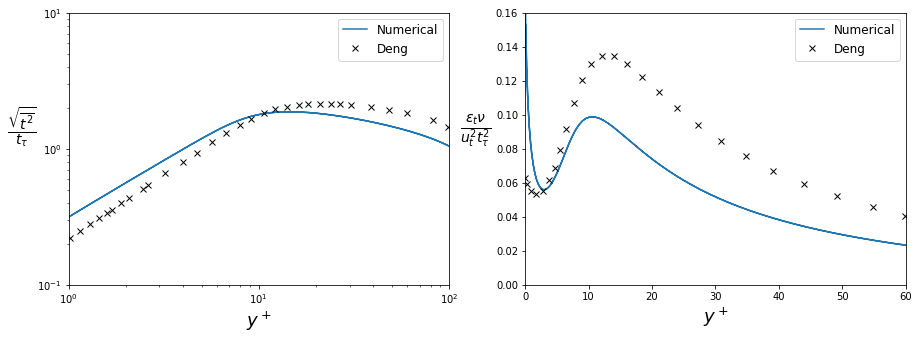

In [4157]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
df_num.plot('yplus', 'kt_scaled',ax=ax1, label='Numerical')
df_val_kt.plot("yplus", "kt",ax=ax1, marker='x', 
               linestyle="None", color='k', label='Deng')
df_num.plot('yplus', 'eps_scaled',ax=ax2, label='Numerical')
df_val_eps.plot('yplus', 'epst',ax=ax2, 
                marker='x', linestyle="None", color='k', label='Deng')


ax1.set_xscale("log")
ax1.set_yscale('log')
ax1.set_ybound(0.1,10)
ax1.set_xbound(1,100)
ax1.set_xlabel(r"$y^+$", fontsize=18)
ax1.set_ylabel(r"$\frac{\sqrt{\overline{t^2}}}{t_{\tau}}$", 
              rotation=0, fontsize=20, labelpad=15)
ax1.legend(prop={'size': 12})

ax2.set_ybound(0,0.16)
ax2.set_xbound(0,60)
ax2.set_xlabel(r"$y^+$", fontsize=18)
ax2.set_ylabel(r"$\frac{\epsilon_t \nu}{u_t^2 t_{\tau}^2}$", 
              rotation=0, fontsize=20, labelpad=20)
ax2.legend(prop={'size': 12})


Text(0, 0.5, '$\\epsilon$')

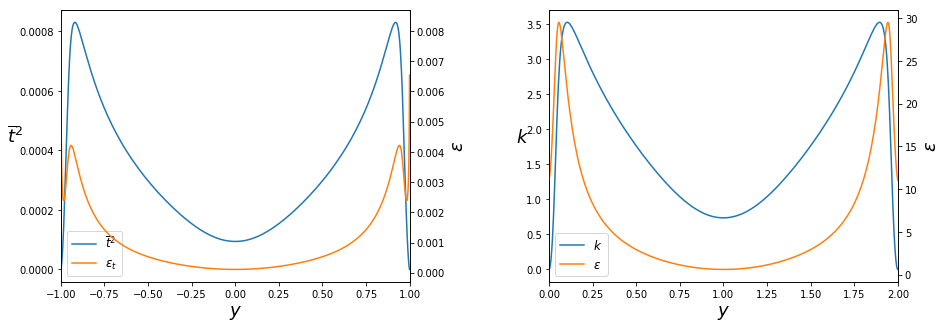

In [4158]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']
fig, (ax1,ax11) = plt.subplots(1,2, figsize=(15,5))
fig.subplots_adjust(wspace=.4)
#ax1.set
ax2 = ax1.twinx()
df_num.plot("y_","kt",ax=ax1, label=r'$\overline{t}^2$')
df_num.plot("y_","epst",ax=ax2, color=colors[1], label=r'$\epsilon_t$')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.get_legend().remove()
ax1.legend(lines + lines2, labels + labels2, loc=0,prop={'size': 12})
ax1.set_xlabel(r'$y$', fontsize=18)
ax1.set_ylabel(r'$\overline{t}^2$', fontsize=18, rotation=0)
ax2.set_ylabel(r'$\epsilon$', fontsize=18)
fig.gca().ticklabel_format(style='scientific',axis='y')

ax21 = ax11.twinx()
df_num.plot('y', 'k',ax=ax11, label=r'$k$')
# df_num.plot('y', 'eps',ax=ax2, color=colors[1])
df_num.plot('y', 'eps',ax=ax21, color=colors[1], label=r'$\epsilon$')

lines, labels = ax11.get_legend_handles_labels()
lines2, labels2 = ax21.get_legend_handles_labels()
ax21.get_legend().remove()
ax11.legend(lines + lines2, labels + labels2, loc=0,prop={'size': 12})
ax11.set_xlabel(r'$y$', fontsize=18)
ax11.set_ylabel(r'$k$', fontsize=18, rotation=0)
ax21.set_ylabel(r'$\epsilon$', fontsize=18)

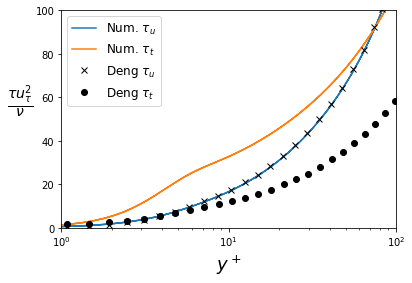

In [4143]:
fig, ax = plt.subplots()
df_num.plot('yplus', 'tau_u',ax=ax, label="Num. "+r'$\tau_u$')
df_num.plot('yplus', 'tau_t',ax=ax, label="Num. "+r'$\tau_t$')
df_val_tauu.plot('yplus', 'tauu',
                 ax=ax, marker='x', label="Deng "+r'$\tau_u$',
                 linestyle="None", color='k')
df_val_taut.plot('yplus', 'taut',
                 ax=ax, marker='o', label="Deng "+r'$\tau_t$',
                 linestyle="None", color='k')


ax.set_xlabel("$y^+$", fontsize=18)
ax.set_ylabel(r"$\frac{\tau u_{\tau}^2}{\nu}$", 
              fontsize=20, rotation=0, labelpad=15)
ax.set_xscale("log")
ax.set_xbound(1,100)
ax.set_ybound(0,100)
ax.legend(prop={'size': 12})

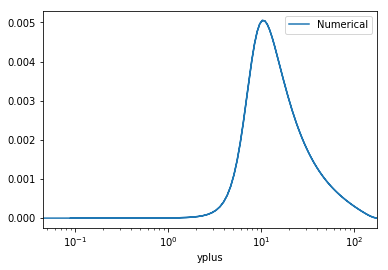

In [4144]:
fig, ax = plt.subplots()
ax.set_xscale("log")
df_num.plot('yplus', 'Pkt',ax=ax, label='Numerical')
# df_val_ratio.plot('yplus', 'ratio',
#                  ax=ax, marker='+', label="Deng "+r'$\tau_t/{\tau_u}$',
# #                  linestyle="None", color='k')
# ax.set_xlabel("$y^+$", fontsize=18)
# ax.set_ylabel(r"$\frac{\tau_t}{\tau_u}$", 
#                fontsize=20, rotation=0, labelpad=15)
# ax.set_xbound(1,100)
# ax.legend(prop={'size': 12})
# ax.set_ybound(0,50)


In [4159]:
df_num['qwall']*Re*Pr

4851   -1.966901
4852   -1.966901
4853   -1.966901
4854   -1.966901
4855   -1.966901
4856   -1.966901
4857   -1.966901
4858   -1.966901
4859   -1.966901
4860   -1.966901
4861   -1.966901
4862   -1.966901
4863   -1.966901
4864   -1.966901
4865   -1.966901
4866   -1.966901
4867   -1.966901
4868   -1.966901
4869   -1.966901
4870   -1.966901
4871   -1.966901
4872   -1.966901
4873   -1.966901
4874   -1.966901
4875   -1.966901
4876   -1.966901
4877   -1.966901
4878   -1.966901
4879   -1.966901
4880   -1.966901
          ...   
5014   -1.966901
5015   -1.966901
5016   -1.966901
5017   -1.966901
5018   -1.966901
5019   -1.966901
5020   -1.966901
5021   -1.966901
5022   -1.966901
5023   -1.966901
5024   -1.966901
5025   -1.966901
5026   -1.966901
5027   -1.966901
5028   -1.966901
5029   -1.966901
5030   -1.966901
5031   -1.966901
5032   -1.966901
5033   -1.966901
5034   -1.966901
5035   -1.966901
5036   -1.966901
5037   -1.966901
5038   -1.966901
5039   -1.966901
5040   -1.966901
5041   -1.9669